## Placement Status Prediction Of a Novice Candidate In Campus Placement 

- **Importing Required Libraries**
- **Loading The Dataset**
- **Exploratory Data Analysis(EDA)**
- **Feature Selection**
- **Data Pre-Processing**
- **Feature Encoding**
- **Decision Tree Based Model**
- **Binary Classification with Logistic Regression**

# Importing Required Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [3]:
data = pd.read_csv("Data_campus.csv")
#Removing Index 
data.drop("sl_no", axis=1, inplace=True)

In [4]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Exploratory Data Analysis(EDA)

## Feature by Feature Data Exploration

### Feature: Gender
#### Impact of gender feature on placements?

In [8]:
data.gender.value_counts()
# Male candidates are twice the female candidates

M    139
F     76
Name: gender, dtype: int64

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


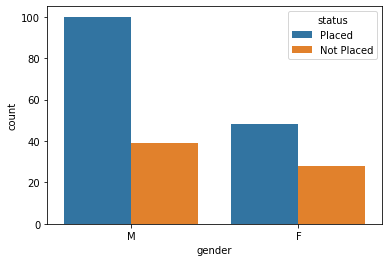

In [9]:
sns.countplot("gender", hue="status", data=data)
plt.show()

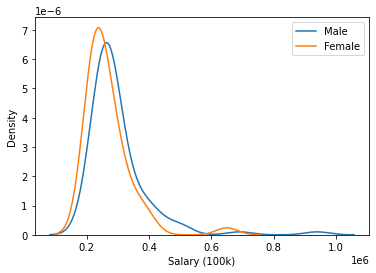

In [10]:
#This plot igores students who are not placed and NaN values for salary,
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

#### Insights

* Number of Male candidates -> 139 and Number of Female candidates -> 76.
* Male candidates have comparatively higher placements. 
* Number of Female candidates not placed -> 30 and Number of Male candidates not placed -> 40.  
* On an average Male students are offered slightly greater salary than female. 
* More outliers on Male -> Male students are getting high CTC jobs.

### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
#### Impact of Secondary Education on placements?

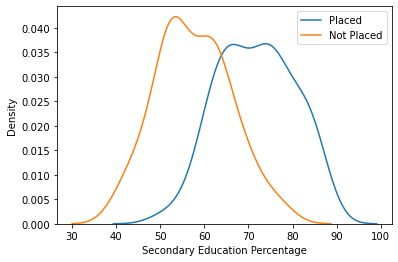

In [11]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

* Students with percentage >90% in Secondary Education are placed
* Students with percentage <50% in Secondary Education are not-placed
* **Good Secondary Education Percentage Students are placed on average.**

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


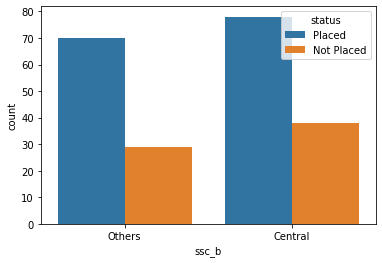

In [12]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

* Board Of Education does not affect Placement Status much

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


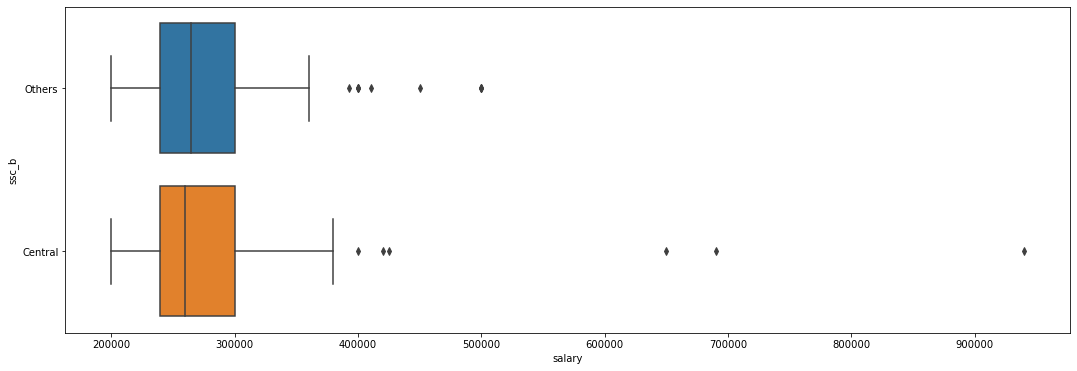

In [13]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

* Outliers are present in both, but students from Central Board are getting the highly paid jobs.

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


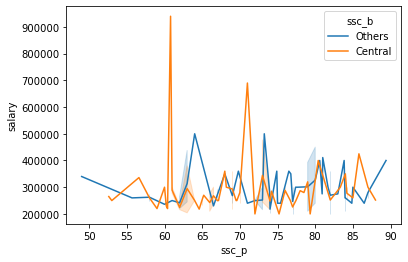

In [14]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

### Features: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)
#### Impact of Higher Secondary School on Placements?

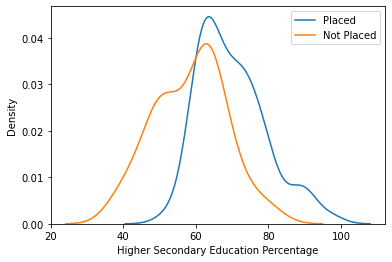

In [15]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

* Overlap here too. More placements for percentage above 65%
* Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


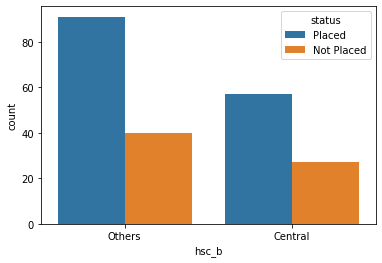

In [16]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

Education Board again, doesn't affect placement status much

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


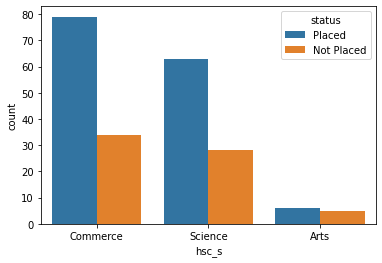

In [17]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

* less Number of students with Arts specialization.
* Science and Commerse students 2:1 placed:unplaced ratio

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


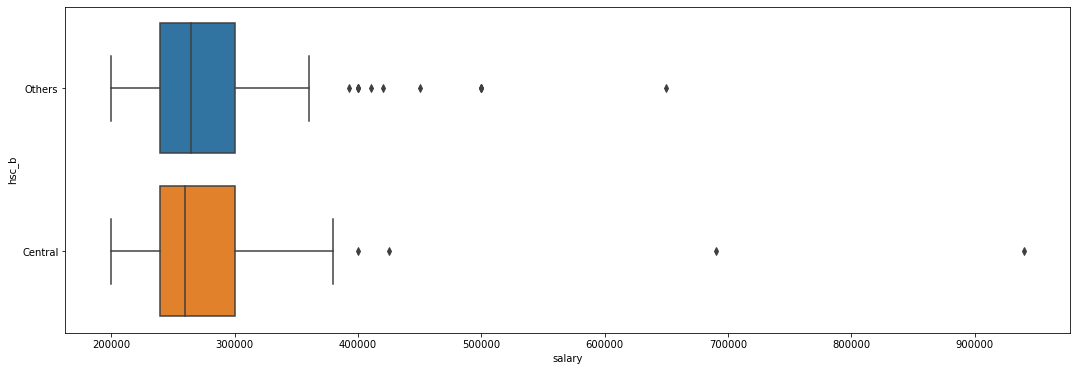

In [18]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

* Outliers are present in both, board doesn't affect getting highly paid jobs. Highest paid job was obtained by student from Central Board though.

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


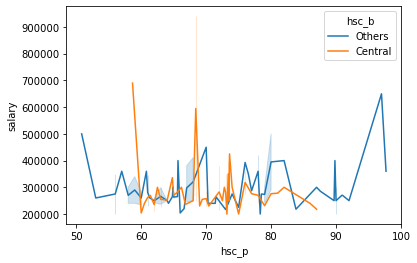

In [19]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()

* High salary from both Central and Other. 
* High salary for both high and low percentage.
* Thus, both these feature doesnot affect salary.

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


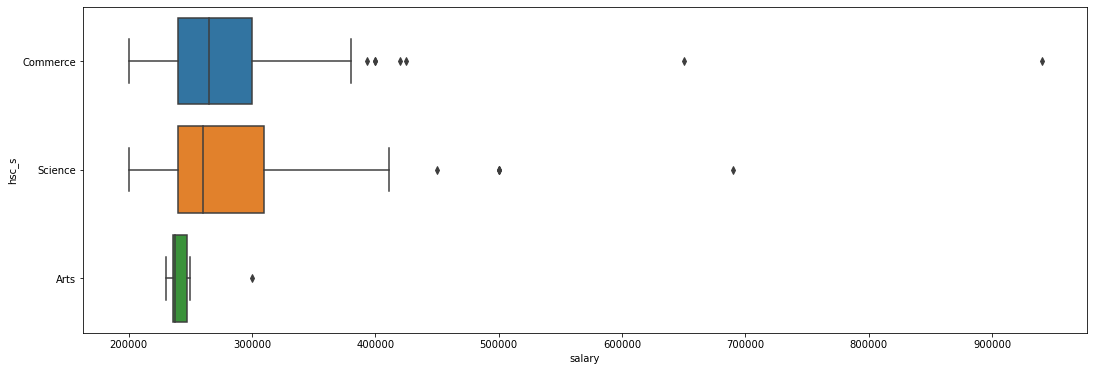

In [20]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

* We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

* Commerse students have slightly better placement status.

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


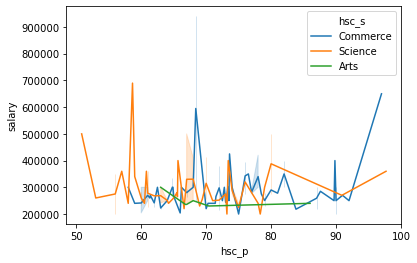

In [21]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=data)
plt.show()

* **Student with Art Specialization surprisingly have comparatively low salary**

### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
#### Does Under Graduate affect placements? 

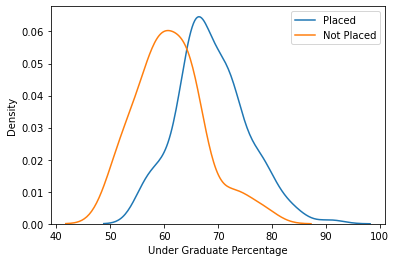

In [22]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

* Overlap here too. But More placements for percentage above 65.
* UG Percentage least 50% to get placement

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


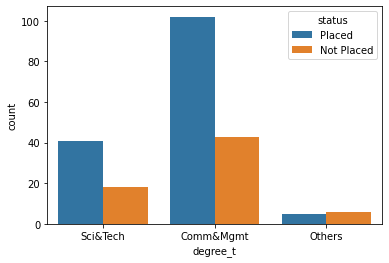

In [23]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

* We have very less students with "Other". We cant make decision from few cases.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


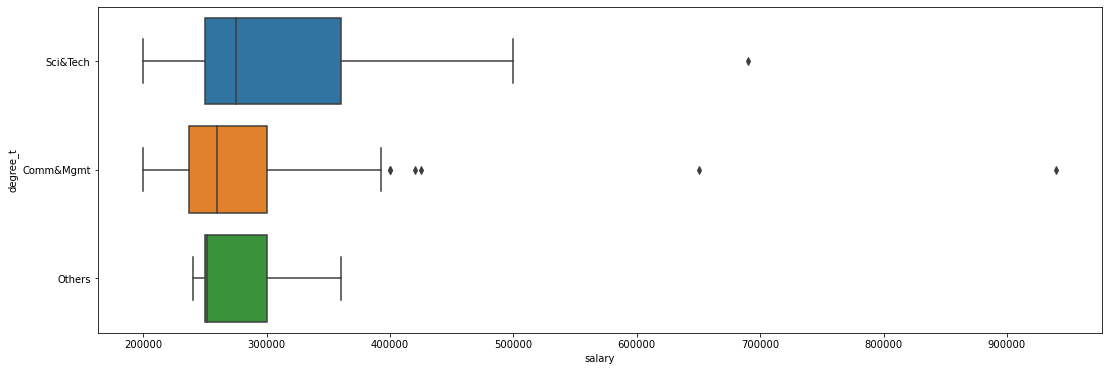

In [24]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

* Science&Tech students getting more salary on average
* Management stidents are getting more highly paid dream jobs. 

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


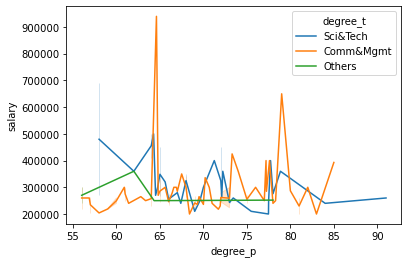

In [25]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()

* Percentage does not seem to affect salary.
* Commerce&Mgmt students occasionally get dream placements with high salary

### Feature: workex (Work Experience)
#### Does Work Experience affect placements?

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


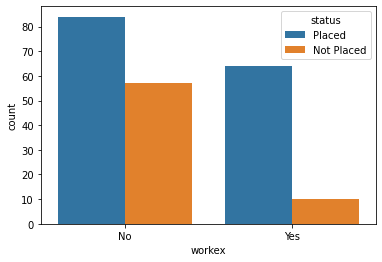

In [26]:
sns.countplot("workex", hue="status", data=data)
plt.show()

* **This affects Placement.** Very few students with work experience not getting placed!

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


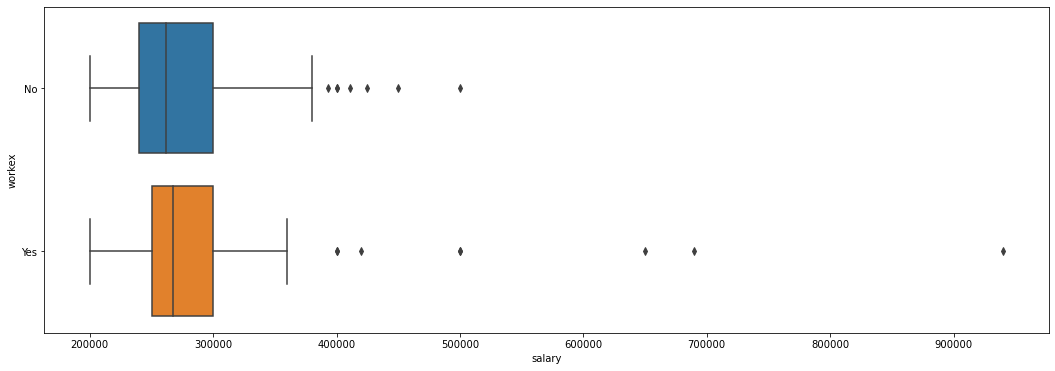

In [27]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

* Outliers (High salary than average) on bith end but **students with experience getting dream jobs**
* Average salary as well as base salary high for students with work experience.

### Feature: etest_p  (Employability test percentage)

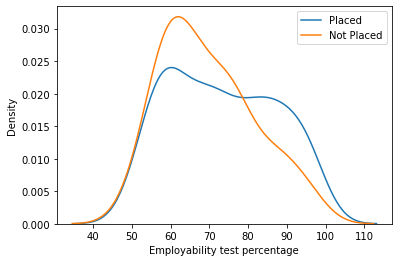

In [28]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


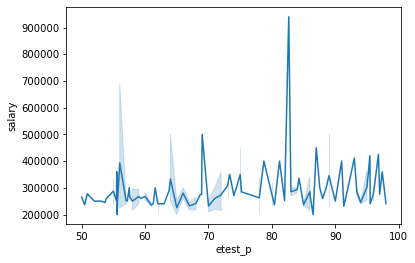

In [29]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

**This feature surprisingly does not affect placements and salary much**

### Feature: specialisation (Post Graduate Specialization)

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


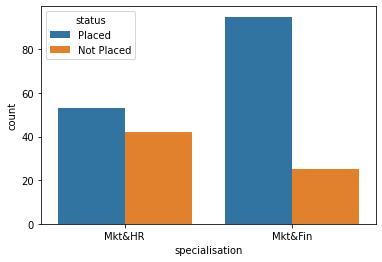

In [30]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

* This feature affects Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


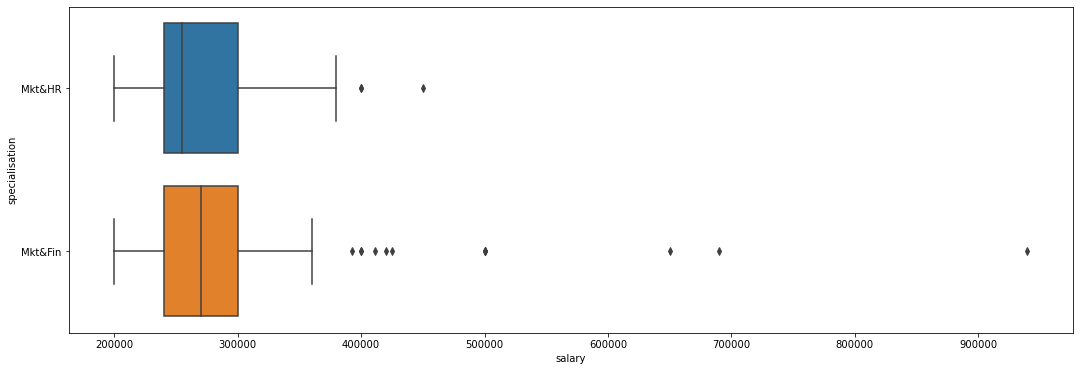

In [31]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

* **More Highly Paid Jobs for Mkt&Fin students **

### Feature: mba_p (MBA percentage)
#### Does MBA Percentage affect placements?

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


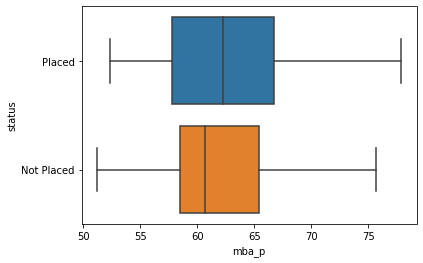

In [32]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

/Users/local/miniconda3/envs/bayesian/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


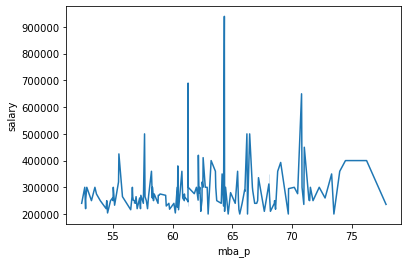

In [33]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA Percentage deos not impact salary much

# Feature Selection

* Gender
* MBA Percentage
* Work Experience
* Specialization
* Under Graduation Degree Field
* Employability test percentage
* Under Graduate Dergree Percentage
* Secondary Education percentage
* Specialization in Higher Secondary Education
* Higher Secondary Education Percentsge

Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)


# Data Pre-Processing

In [34]:
data.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

## Feature Encoding

In [35]:
data.dtypes
# encoding gender,hsc_s, degree_t, workex, specialisation and status

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [36]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [37]:
#making a copy of data, before we proceeed further
data_clf = data.copy()
data_reg = data.copy()

## Binary Classification Problem

### Decision Tree Based Models

**Using Decision Tree based Algorithm does not require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding**

In [38]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Dropping Salary Feature

Since students might have different source of incomes, filling zeros for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary.

In [39]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [40]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.7230769230769231

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.80      0.57        15
           1       0.92      0.70      0.80        50

    accuracy                           0.72        65
   macro avg       0.68      0.75      0.68        65
weighted avg       0.81      0.72      0.74        65



In [44]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7692307692307693

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.73      0.59        15
           1       0.91      0.78      0.84        50

    accuracy                           0.77        65
   macro avg       0.70      0.76      0.72        65
weighted avg       0.81      0.77      0.78        65



### Binary Classification with Logistic Regression

### One Hot Encoding

Encoding Categorical Features 

In [49]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

<ipython-input-49-1c1e43ff5787>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
<ipython-input-49-1c1e43ff5787>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
<ipython-input-49-1c1e43ff5787>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [50]:
#One-Hot Encoding
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

### Feature Scaling

* Percentages are on scale 0-100 
* Categorical Features are on range 0-1 (By one hot encoding)


**Scaling Everything between 0 and 1 (This wont affect one-hot encoded values)**

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.8615384615384616

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.87      0.93      0.90        43

    accuracy                           0.86        65
   macro avg       0.86      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65

